In [ ]:
import seaborn as sns

iris=sns.load_dataset('iris')
iris.head()
sns.set()

%matplotlib inline

sns.pairplot(iris,hue='species',height=1.5)

X_iris=iris.drop('species',axis=1)
y_iris=iris['species']
print(X_iris.shape)
print(y_iris.shape)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

rng=np.random.RandomState(42)
x=10*rng.rand(50)
y=2*x-1+rng.randn(50)
plt.scatter(x,y)

model=LinearRegression(fit_intercept=True)
model
X=x[:,np.newaxis]
X.shape
model.fit(X,y)
print(model.coef_)
print(model.intercept_)

x_l=np.random.uniform(-5,15,100)
y_l=x_l*model.coef_+model.intercept_
plt.scatter(x_l,y_l)
plt.show()


In [ ]:
xfit=np.linspace(-1,11)
Xfit=xfit[:,np.newaxis]
yfit=model.predict(Xfit)
plt.scatter(x,y)
plt.plot(xfit,yfit)



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

X_train,X_test,y_train,y_test=train_test_split(X_iris,y_iris,random_state=1)

model=GaussianNB()
model.fit(X_train,y_train)
y_model=model.predict(X_test)
accuracy_score(y_test,y_model)

In [1]:
from sklearn.decomposition import PCA

model=PCA(n_components=2)
model.fit(X_iris)
X_2D=model.transform(X_iris)

iris['PCA1']=X_2D[:,0]
iris['PCA2']=X_2D[:,1]
sns.lmplot("PCA1","PCA2",hue='species',data=iris,fit_reg=False)


NameError: name 'X_iris' is not defined

In [2]:
from sklearn.mixture import GaussianMixture


model=GaussianMixture(n_components=3,covariance_type='full')
model.fit(X_iris)
y_gmm=model.predict(X_iris)

iris['cluster']=y_gmm
sns.lmplot("PCA1","PCA2",data=iris,hue='species',col='cluster',fit_reg=False)


NameError: name 'X_iris' is not defined

In [ ]:
from sklearn.datasets import load_digits

digits=load_digits()
digits.images.shape

fig,axes=plt.subplots(10,10,figsize=(8,8),
                     subplot_kw={'xticks':[],'yticks':[]},
                     gridspec_kw=dict(hspace=0.5,wspace=0.1))

for i,ax in enumerate(axes.flat):
    
    ax.imshow(digits.images[i],cmap='binary',interpolation='nearest')
    ax.text(0.05,0.05,str(digits.target[i]),
           transform=ax.transAxes,color='green')


X=digits.data
y=digits.target



In [ ]:
from sklearn.manifold import Isomap

iso=Isomap(n_components=2)
iso.fit(digits.data)
data_projected=iso.transform(digits.data)

plt.scatter(data_projected[:,0],data_projected[:,1],
           c=digits.target,edgecolor='none',alpha=0.5,
           cmap=plt.cm.get_cmap('gist_earth',10))
plt.colorbar(label='digit label',ticks=range(10))
plt.clim(-0.5,9.5)
plt.show()


In [ ]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,random_state=0)

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix

model=GaussianNB()
model.fit(Xtrain,ytrain)
y_model=model.predict(Xtest)
accuracy_score(ytest,y_model)

mat=confusion_matrix(ytest,y_model)
sns.heatmap(mat,square=True,annot=True,cbar=False)

plt.xlabel('predicted value')
plt.ylabel('true value')



In [ ]:
fig,axes=plt.subplots(10,10,figsize=(8,8),
                     subplot_kw={'xticks':[],'yticks':[]},
                     gridspec_kw=dict(hspace=0.1,wspace=0.1))

for i,ax in enumerate(axes.flat):
    
    ax.imshow(digits.images[i],cmap='binary',interpolation='nearest')
    ax.text(0.05,0.05,str(y_model[i]),
           transform=ax.transAxes,
            color='green' if(ytest[i]==y_model[i])else 'red')




In [ ]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

iris=load_iris()
X=iris.data
y=iris.target

model=KNeighborsClassifier(n_neighbors=1)
model.fit(X,y)
y_model=model.predict(X)
print(accuracy_score(y,y_model))


X1,X2,y1,y2=train_test_split(X,y,random_state=0,train_size=0.5)
model.fit(X1,y1)

y2_model=model.predict(X2)
print(accuracy_score(y2,y2_model))

y2_model=model.fit(X1,y1).predict(X2)
y1_model=model.fit(X2,y2).predict(X1)

print(accuracy_score(y1,y1_model),accuracy_score(y2,y2_model))

from sklearn.model_selection import cross_val_score
# repeat cross validation k=5
print(cross_val_score(model,X,y,cv=5))

from sklearn.model_selection import LeaveOneOut

#150 trials
scores=cross_val_score(model,X,y,cv=LeaveOneOut())
print(scores)
print(scores.mean())

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as plt
import seaborn 

seaborn.set()

def PolynomialRegression(degree=2,**kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                        LinearRegression(**kwargs))


def make_data(N,err=1.0,rseed=1):
    
    rng=np.random.RandomState(rseed)
    X=rng.rand(N,1)**2
    y=10 - 1. / (X.ravel()+0.1)
    if err >0:
        y+=err*rng.randn(N)
    return X,y

X,y = make_data(40)

X_test=np.linspace(-0.1,1.1,500)[:,None]
plt.scatter(X.ravel(),y,color='black')
axis=plt.axis()

for degree in [1,3,5,10,12]:
    y_test=PolynomialRegression(degree).fit(X,y).predict(X_test)
    plt.plot(X_test.ravel(),y_test,label='degree={0}'.format(degree))

plt.xlim(-0.1,1.0)
plt.ylim(-2,12)

plt.legend(loc='best')




In [ ]:
from sklearn.model_selection import validation_curve

degree=np.arange(0,21)

train_score,val_score=validation_curve(PolynomialRegression(),X,y,
                                      'polynomialfeatures__degree',
                                      degree,cv=7)


plt.plot(degree,np.median(train_score,1),color='blue',label='training score')
plt.plot(degree,np.median(val_score,1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0,1)
plt.xlabel('degree')
plt.ylabel('score')


In [ ]:
plt.scatter(X.ravel(),y)
lim=plt.axis()

y_test=PolynomialRegression(3).fit(X,y).predict(X_test)
plt.plot(X_test.ravel(),y_test)
plt.axis(lim)

In [ ]:
X2,y2=make_data(200)

plt.scatter(X2.ravel(),y2)

degree=np.arange(21)
train_score2,val_score2=validation_curve(PolynomialRegression(),X2,y2,
                                        'polynomialfeatures__degree',
                                        degree,cv=7)

plt.plot(degree,np.median(train_score2,1),color='blue',
        label='training score')

plt.plot(degree,np.median(val_score2,1),color='red',label='validation score')
plt.plot(degree,np.median(train_score,1),color='blue',alpha=0.3,linestyle='dashed')
plt.plot(degree,np.median(val_score,1),color='red',alpha=0.3,linestyle='dashed')

plt.legend(loc='lower center')
plt.ylim(0,1)
plt.xlabel('degree')
plt.ylabel('score')


In [ ]:
from sklearn.model_selection import learning_curve

fig,ax=plt.subplots(1,2,figsize=(16,6))
fig.subplots_adjust(left=0.0625,right=0.95,wspace=0.1)

for i,degree in enumerate([2,7]):
    N, train_lc,val_lc=learning_curve(PolynomialRegression(degree),
                                     X,y,cv=7,
                                     train_sizes=np.linspace(0.3,1,25))
    ax[i].plot(N,np.mean(train_lc,1),color='blue',label='training score')
    ax[i].plot(N,np.mean(val_lc,1),color='red',label='validation score')
    ax[i].hlines(np.mean([train_lc[-1],val_lc[-1]]),N[0],N[-1],color='gray',linestyle='dashed')
    ax[i].set_ylim(0,1                  )
    ax[i].set_xlim(N[0],N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree={0}'.format(degree),size=14)
    ax[i].legend(loc='best')


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree':np.arange(21),
              'linearregression__fit_intercept':[True,False],
              'linearregression__normalize':[True,False]}

grid=GridSearchCV(PolynomialRegression(),param_grid,cv=7)

grid.fit(X,y)
print(grid.best_params_)

model=grid.best_estimator_
plt.scatter(X.ravel(),y)
lim=plt.axis()
y_test=model.fit(X,y).predict(X_test)
plt.plot(X_test.ravel(),y_test,True)
plt.axis(lim)



In [ ]:

data= [
    {'price':850000, 'rooms':4, 'neighborhood':'Queen Anne'},
    {'price':700000, 'rooms':3, 'neighborhood':'Fremont'},
    {'price':650000, 'rooms':3, 'neighborhood':'Wallingford'},
    {'price':600000, 'rooms':2, 'neighborhood':'Tremont'},
]


from sklearn.feature_extraction import DictVectorizer
vec=DictVectorizer(sparse=True,dtype=int)
vec.fit_transform(data)
#print(vec.get_feature_names())

sample=['problem of evil','evil queen','horizon problem']

from sklearn.feature_extraction.text import CountVectorizer

vec=CountVectorizer()
X=vec.fit_transform(sample)
print(X)

import pandas as pd

pd.DataFrame(X.toarray(),columns=vec.get_feature_names())

from sklearn.feature_extraction.text import TfidfVectorizer

vec=TfidfVectorizer()
X=vec.fit_transform(sample)
pd.DataFrame(X.toarray(),columns=vec.get_feature_names())




In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x=np.array([1,2,3,4,5])
y=np.array([4,2,1,3,7])
plt.scatter(x,y)
from sklearn.linear_model import LinearRegression

X= x[:,np.newaxis]
model=LinearRegression().fit(X,y)
yfit=model.predict(X)
#plt.scatter(x,y)
#plt.plot(x,yfit)

from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=6,include_bias=False)

X2=poly.fit_transform(X)
print(X2)
model=LinearRegression().fit(X2,y)
yfit=model.predict(X2)
plt.scatter(x,y)
plt.plot(x,yfit)

In [ ]:
from numpy import nan

X=np.array([[nan,0,3],
            [3  ,7,9],
            [3  ,5,2],
            [4, nan,6],
            [8,8,1]])

y=np.array([14,16,-1,8,-5])
print(X,y)

from sklearn.impute import SimpleImputer

imp=SimpleImputer(strategy='mean')
X2=imp.fit_transform(X)
print(X2)

model=LinearRegression().fit(X2,y)
model.predict(X2)


from sklearn.pipeline import make_pipeline

model=make_pipeline(SimpleImputer(strategy='mean'),
                   PolynomialFeatures(degree=4),
                   LinearRegression())
model.fit(X,y)
print(y)
print(model.predict(X))



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs


sns.set()
X,y=make_blobs(100,2,centers=3,random_state=2,cluster_std=1.5)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='RdBu')




In [ ]:
from sklearn.naive_bayes import GaussianNB

model=GaussianNB()
model.fit(X,y)
rng=np.random.RandomState(42)
Xnew=[-6,-14] + [14,18] * rng.randn(2000,2)
ynew=model.predict(Xnew)

plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='viridis')
lim=plt.axis()

plt.scatter(Xnew[:,0],Xnew[:,1],c=ynew,s=20,cmap='viridis',alpha=0.5)
plt.axis(lim)


In [ ]:
yprob=model.predict_proba(Xnew)
#prob a priori
print("     P(C1)   P(C2)  P(C3))")
yprob[-8:].round(2)


In [ ]:
from sklearn.datasets import fetch_20newsgroups

data=fetch_20newsgroups()
print(data.target_names)



In [ ]:
cat=['talk.religion.misc','soc.religion.christian','sci.space','comp.graphics']
train=fetch_20newsgroups(subset='train',categories=cat)
test=fetch_20newsgroups(subset='test',categories=cat)


In [ ]:
print(train.data[5])
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix

model=make_pipeline(TfidfVectorizer(),MultinomialNB())
model.fit(train.data,train.target)
labels=model.predict(test.data)

mat=confusion_matrix(test.target,labels)

sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=True,
           xticklabels=train.target_names,yticklabels=train.target_names)

plt.xlabel('true label')
plt.ylabel('predicted label')



In [ ]:
def predictive_category(s,train=train,model=model):
    pred=model.predict([s])
    return train.target_names[pred[0]]

print(predictive_category('send a payload to christ'))
print(predictive_category('GPU is better'))
print(predictive_category('TPU AMD'))
print(predictive_category('xray'))
print(predictive_category(' giuda '))



In [ ]:
### LINEAR REGRESSION

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set()

def print_result(model):
    print("Model intercept:",model.intercept_)
    print("Model coefficents:{0}".format(model.coef_))

rng=np.random.RandomState(1)
x=10*rng.rand(50)
y=2*x-5+rng.randn(50)

plt.scatter(x,y)
## best fit line through the data
from sklearn.linear_model import LinearRegression

model=LinearRegression(fit_intercept=True) ## terminte noto
model_1=LinearRegression(fit_intercept=False)
model.fit(x[:,np.newaxis],y)
model_1.fit(x[:,np.newaxis],y)
xfit=np.linspace(0,10,1000)
yfit=model.predict(xfit[:,np.newaxis])
yfit_1=model_1.predict(xfit[:,np.newaxis])
plt.scatter(x,y)
plt.plot(xfit,yfit)
plt.plot(xfit,yfit_1)

print_result(1,model)
print_result(1,model_1)


X=10+rng.rand(100,3)
y=0.5+np.dot(X,[1.5,-2,1.])

model.fit(X,y)
print_result(model)



In [ ]:
from sklearn.preprocessing import PolynomialFeatures
x=np.array([2,3,4])
poly=PolynomialFeatures(3,include_bias=False)
poly.fit_transform(x[:,None])


from sklearn.pipeline import make_pipeline

poly_model=make_pipeline(PolynomialFeatures(10),LinearRegression())

rng=np.random.RandomState(1)
x=10*rng.rand(50)
y=np.sin(x)+0.1*rng.randn(50)

poly_model.fit(x[:,np.newaxis],y)
yfit=poly_model.predict(xfit[:,np.newaxis])

print(poly_model)
plt.scatter(x,y)
plt.plot(xfit,yfit)



In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator,TransformerMixin):
    
    def __init__(self,N,width_factor=2.0):
        self.N=N
        self.width_factor=width_factor
    
    @staticmethod
    def _gauss_basis(x,y,width,axis=None):
        arg= (x-y)/width
        return np.exp(-0.5 * np.sum(arg **2,axis))

    def fit(self,X,y=None):
        self.centers_=np.linspace(X.min(),X.max(),self.N)
        self.width=self.width_factor*(self.centers_[1]-self.centers_[0])
        return self
    
    def transform(self,X):
        return self._gauss_basis(X[:,:,np.newaxis],self.centers_,self.width_factor,axis=1)

gauss_model=make_pipeline(GaussianFeatures(20),LinearRegression())
gauss_model.fit(x[:,np.newaxis],y)

yfit=gauss_model.predict(xfit[:,np.newaxis])

plt.scatter(x,y)
plt.plot(xfit,yfit)
plt.xlim(0,10)

In [ ]:
model =make_pipeline(GaussianFeatures(100),LinearRegression())
model.fit(x[:,np.newaxis],y)
plt.figure(figsize=(16,10))
plt.scatter(x,y)
plt.plot(xfit,model.predict(xfit[:,np.newaxis]))
plt.xlim(0,15)
plt.ylim(-1.5,1.5)


def basis_plot(model,title=None):
    fig,ax=plt.subplots(2,sharex=True)
    model.fit(x[:,np.newaxis],y)
    #ax[0].figure(figsize=(16,10))
    ax[0].scatter(x,y)
    ax[0].plot(xfit,model.predict(xfit[:,np.newaxis]))
    
    if title:
        ax[0].set_title(title)
    ax[1].plot(model.steps[0][1].centers_,
              model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
              ylabel='coefficent',
              xlim=(0,10))
model=make_pipeline(GaussianFeatures(40),LinearRegression())
basis_plot(model)


In [ ]:
from sklearn.linear_model import Ridge

model=make_pipeline(GaussianFeatures(30),Ridge(alpha=0.4))

basis_plot(model,title='Ridge Regression')




In [ ]:
from sklearn.linear_model import Lasso

model=make_pipeline(GaussianFeatures(30),Lasso(alpha=0.001))
basis_plot(model,title='Lasso Regression')


In [ ]:
#### SVM

from scipy import stats
from sklearn.datasets.samples_generator import make_blobs

X,y = make_blobs(n_samples=50,centers=2,random_state=0,cluster_std=0.6)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
print(X[:,0])

xfit=np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')

plt.plot([0.6],[2.1],'x',color='red',markeredgewidth=2,markersize=10)

for m,b in [(1,0.65),(0.5,1.6),(-0.2,2.9)]:
    plt.plot(xfit,m*xfit+b,'-k')
    
plt.xlim(-1,3.5)



In [ ]:
xfit=np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')

for m,b,d in [(1,0.65,0.33),(0.5,1.6,0.55),(-0.2,2.9,0.2)]:
    yfit=m*xfit+b
    plt.plot(xfit,yfit,'-k')
    plt.fill_between(xfit,yfit-d,yfit+d,edgecolor='none',color='#111111',alpha=0.4)
    
plt.xlim(-1,3.5)

In [ ]:
from sklearn.svm import SVC

model=SVC(kernel='linear',C=1E10)
model.fit(X,y)


def plot_svc_decision_function(model,ax=None,plot_support=True):
    if ax is None:
        ax=plt.gca()
    xlim=ax.get_xlim()
    ylim=ax.get_ylim()
    
    x=np.linspace(xlim[0],xlim[1],30)
    y=np.linspace(ylim[0],ylim[1],30)
    Y,X=np.meshgrid(y,x)
    xy=np.vstack([X.ravel(),Y.ravel()]).T
    P=model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X,Y,P,colors='k',
              levels=[-1,0,1],alpha=0.5,
              linestyles=['--','-','--'])
    
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                   model.support_vectors_[:,1],
                  s=300,linewidth=1,facecolors='none')
        
        
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(model)
print("Model support",model.support_vectors_)

In [ ]:


def plot_svm(N=10,ax=None):
    
    X,y=make_blobs(n_samples=200,centers=2,random_state=0,cluster_std=0.6)
    X=X[:N]
    y=y[:N]
    model=SVC(kernel='linear',C=1E10)
    model.fit(X,y)
    
    ax=ax or plt.gca()
    ax.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
    ax.set_xlim(-1,4)
    ax.set_ylim(-1,6)
    plot_svc_decision_function(model,ax)

fig,ax=plt.subplots(1,3,figsize=(16,6))
fig.subplots_adjust(left=0.0625,right=0.95,wspace=0.1)
for axi,N in zip(ax,[60,120,180]):
    plot_svm(N,axi)
    axi.set_title('N = {0}'.format(N))
    


In [ ]:
from ipywidgets import interact,fixed

interact(plot_svm,N=[10,200],ax=fixed(None))


In [ ]:
from sklearn.datasets.samples_generator import make_circles

X,y=make_circles(100,factor=.1,noise=.1)
clf=SVC(kernel='linear').fit(X,y)

plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(clf,plot_support=False)

In [ ]:
r=np.exp(-(X**2).sum(1))
from mpl_toolkits import mplot3d


def plot_3D(elev=30,azim=30,X=X,y=y):
    ax=plt.subplot(projection='3d')
    ax.scatter3D(X[:,0],X[:,1],r,c=y,s=50,cmap='autumn')
    ax.view_init(elev=elev,azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D,elev=[-90,90],azip=(-180,180),X=fixed(X),y=fixed(y))


In [ ]:
clf=SVC(kernel='rbf',C=1E6)
clf.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='viridis')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],
          s=300,lw=1,facecolors='none')

In [ ]:
X,y =make_blobs(n_samples=100,centers=2,random_state=0,cluster_std=1.2)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')


In [ ]:
X,y =make_blobs(n_samples=100,centers=2,random_state=0,cluster_std=0.8)

fig,ax=plt.subplots(1,3,figsize=(16,6))
fig.subplots_adjust(left=0.0625,right=0.95,wspace=0.1)

for axi,C in zip(ax,[10.0,0.1,50]):
    model=SVC(kernel='linear',C=C).fit(X,y)
    axi.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
    plot_svc_decision_function(model,axi)
    axi.scatter(model.support_vectors_[:,0],
                model.support_vectors_[:,1],
               s=300,lw=1,facecolors='none')
    axi.set_title('C = {0:.1f}'.format(C),size=14)
    
    
    

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces=fetch_lfw_people(min_faces_per_person=60)

print(faces.target_names)
print(faces.images.shape)


fig,ax = plt.subplots(3,5)
for i,axi in enumerate(ax.flat):
    axi.imshow(faces.images[i],cmap='bone')
    axi.set(xticks=[],yticks=[],
           xlabel=faces.target_names[faces.target[i]])



<ipython-input-4-0149664268d1>:34: UserWarning: The following kwargs were not used by contour: 'clim'
  contours=ax.contourf(xx,yy,Z,alpha=0.3,


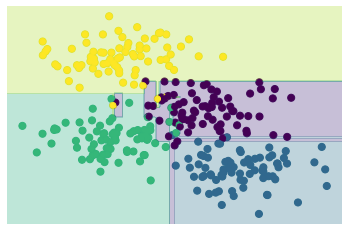

In [4]:
#### DECISION TREE RANDOM FOREST

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

sns.set()

X,y = make_blobs(n_samples=300,centers=4,
                 random_state=0,cluster_std=1.0)

plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='viridis')

from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier().fit(X,y)

def visualize_class(model,X,y,ax=None,cmap='viridis'):
    ax= ax or plt.gca()
    
    ax.scatter(X[:,0],X[:,1],c=y,s=30,cmap=cmap,
              clim=(y.min(),y.max()),zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim=ax.get_xlim()
    ylim=ax.get_ylim()
    
    model.fit(X,y)
    xx,yy=np.meshgrid(np.linspace(*xlim,num=200),
                      np.linspace(*ylim,num=200))
    Z=model.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
    
    n_classes=len(np.unique(y))
    contours=ax.contourf(xx,yy,Z,alpha=0.3,
                         levels=np.arange(n_classes+1)-0.5,
                         cmap=cmap,clim=(y.min(),y.max()),zorder=1)
    ax.set(xlim=xlim,ylim=ylim)
    
visualize_class(DecisionTreeClassifier(),X,y)


<ipython-input-4-0149664268d1>:34: UserWarning: The following kwargs were not used by contour: 'clim'
  contours=ax.contourf(xx,yy,Z,alpha=0.3,


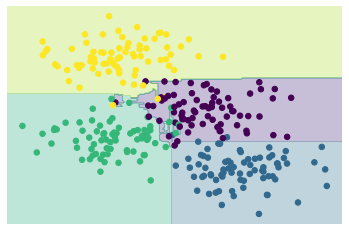

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree=DecisionTreeClassifier()
bag=BaggingClassifier(tree,n_estimators=100,max_samples=0.8,random_state=1)

bag.fit(X,y)
visualize_class(bag,X,y)


<ipython-input-4-0149664268d1>:34: UserWarning: The following kwargs were not used by contour: 'clim'
  contours=ax.contourf(xx,yy,Z,alpha=0.3,


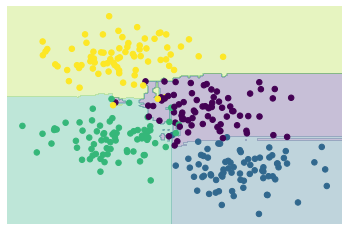

In [6]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=100,random_state=0)
visualize_class(model,X,y)

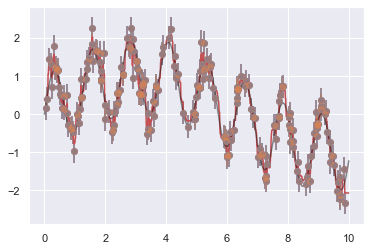

In [8]:
rng=np.random.RandomState(42)
x=10* rng.rand(200)

def model(x,sigma=0.3):
    fast_osc=np.sin(5*x)
    slow_osc=np.sin(0.5*x)
    noise=sigma*rng.randn(len(x))
    return slow_osc+fast_osc +noise

y=model(x)
plt.errorbar(x,y,0.3,fmt='o')

from sklearn.ensemble import RandomForestRegressor

forest=RandomForestRegressor(200)

forest.fit(x[:,None],y)
xfit=np.linspace(0,10,1000)
yfit=forest.predict(xfit[:,None])
ytrue=model(xfit,sigma=0)
plt.errorbar(x,y,0.3,fmt='o',alpha=0.5)
plt.plot(xfit,yfit,'-r')
plt.plot(xfit,ytrue,'-k',alpha=0.5)


[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
[0.7625315 0.0184779]
Origin shape: (200, 2)
Transfr shape: (200, 1)
(1797, 64)
(1797, 2)


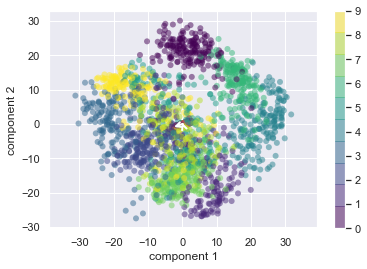

In [15]:
####   PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

rng=np.random.RandomState(1)
X=np.dot(rng.rand(2,2),rng.randn(2,200)).T
plt.scatter(X[:,0],X[:,1])
plt.axis('equal')

from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca.fit(X)
print(pca.components_)
print(pca.explained_variance_)

def draw_vector(v0,v1,ax=None):
    ax=ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0,
                    shrinkB=0)
    ax.annotate('',v1,v0,arrowprops=arrowprops)

plt.scatter(X[:,0],X[:,1],alpha=0.2)
for length,vector in zip(pca.explained_variance_,pca.components_):
    v=vector*3*np.sqrt(length)
    draw_vector(pca.mean_,pca.mean_+v)
    
plt.axis('equal')

pca=PCA(n_components=1)
pca.fit(X)
X_pca=pca.transform(X)
print("Origin shape:",X.shape)
print("Transfr shape:",X_pca.shape)

X_new=pca.inverse_transform(X_pca)
plt.scatter(X[:,0],X[:,1],alpha=0.2)
plt.scatter(X_new[:,0],X_new[:,1],alpha=0.8)
plt.axis('equal')



from sklearn.datasets import load_digits
digits=load_digits()
digits.data.shape
    

pca=PCA(2)
projected=pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

plt.scatter(projected[:,0],projected[:,1],
            c=digits.target, edgecolor='none',alpha=0.5,
            cmap=plt.cm.get_cmap('viridis',10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()


Text(0, 0.5, ' cum exp variance')

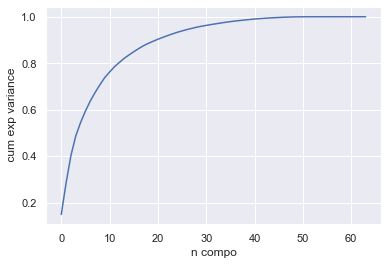

In [16]:
pca=PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('n compo')
plt.ylabel(' cum exp variance')


(-0.1089571412684307,
 4.1303023353895725,
 0.0447585776140384,
 0.9990273515924064)

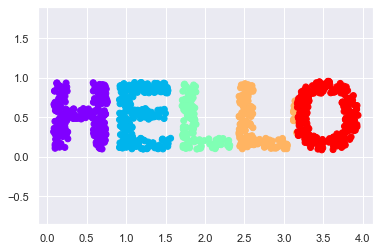

In [6]:
### MANIFOLD LEARN

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set()

def make_hello(N=1000,rseed=42):
    fig,ax=plt.subplots(figsize=(4,1))
    fig.subplots_adjust(left=0,right=1,bottom=0,top=1)
    ax.axis('off')
    ax.text(0.5,0.4,'HELLO',va='center',ha='center',weight='bold',size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    
    from matplotlib.image import imread
    data=imread('hello.png')[::-1,:,0].T
    rng=np.random.RandomState(rseed)
    X=rng.rand(4*N,2)
    i,j=(X*data.shape).astype(int).T
    mask=(data[i,j]<1)
    X=X[mask]
    X[:,0]*=(data.shape[0]/data.shape[1])
    X=X[:N]
    return X[np.argsort(X[:,0])]

X=make_hello(1000)
colorize=dict(c=X[:,0],cmap=plt.cm.get_cmap('rainbow',5))
plt.scatter(X[:,0],X[:,1],**colorize)
plt.axis('equal')

(4.607715441204515, 8.745900824125954, 5.035821528466808, 7.243272110369881)

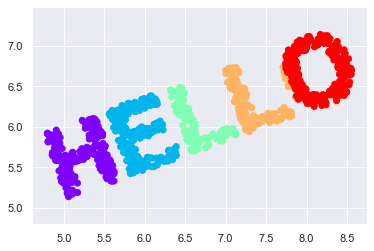

In [7]:
def rotate(X,angle):
    theta=np.deg2rad(angle)
    R=[[np.cos(theta),np.sin(theta)],
       [-np.sin(theta),np.cos(theta)]]
    return np.dot(X,R)
X2=rotate(X,20)+5
plt.scatter(X2[:,0],X2[:,1],**colorize)
plt.axis('equal')


[[0.         0.34803471 0.00916819 ... 3.85520767 3.8418581  3.85958502]
 [0.34803471 0.         0.34018159 ... 3.83720462 3.84809626 3.85279095]
 [0.00916819 0.34018159 0.         ... 3.84979646 3.83697459 3.8544155 ]
 [0.0450506  0.30337243 0.03683646 ... 3.84564879 3.83538529 3.85145247]
 [0.32637768 0.0229946  0.31841895 ... 3.8299247  3.83931385 3.84481317]]


<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


(-50.95743195642188, 999.5, 999.5, -51.92795207519167)

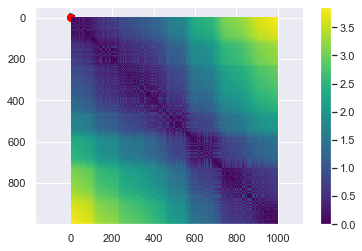

In [12]:
from sklearn.metrics import pairwise_distances
D=pairwise_distances(X)
D.shape
print(D[:5])
plt.imshow(D,zorder=2,cmap='viridis',interpolation='nearest')
plt.colorbar()
D2=pairwise_distances(X2)
np.allclose(D,D2)



(-1.0291497799483857,
 1.0278567681719446,
 -2.0494894050096297,
 2.120281644043412)

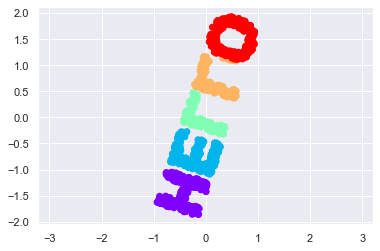

In [13]:
from sklearn.manifold import MDS

model=MDS(n_components=2,dissimilarity='precomputed',random_state=1)
out=model.fit_transform(D)

plt.scatter(out[:,0],out[:,1],**colorize)
plt.axis('equal')


TypeError: loop of ufunc does not support argument 0 of type NoneType which has no callable sqrt method

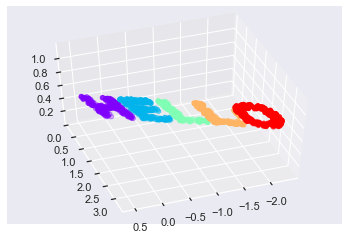

In [17]:
def random_proj(X,dimension=3,rseed=42):
    assert dimension >=X.shape[1]
    rng=np.random.RandomState(rseed)
    C=rng.randn(dimension,dimension)
    e,V=np.linalg.eigh(np.dot(C,C.T))
    return np.dot(X,V[:X.shape[1]])

X3=random_proj(X,3)
X3.shape


from mpl_toolkits import mplot3d
ax=plt.axes(projection='3d')
ax.scatter3D(X3[:,0],X3[:,1],X3[:,2],**colorize)
ax.view_init(azim=70,elev=50)


model=MDS(n_components=2,random_state=1)
out3=model.fit_transform(X3)
plt.scatter(out3[:,0],out3[:,1],**colorize)
plt.axis('equal')



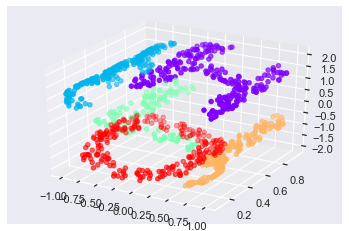

In [19]:
def make_hello_s_curve(X):
    t=(X[:,0]-2)*0.75*np.pi
    x=np.sin(t)
    y=X[:,1]
    z=np.sign(t)*(np.cos(t)-1)
    return np.vstack((x,y,z)).T

XS=make_hello_s_curve(X)
ax=plt.axes(projection='3d')
ax.scatter3D(XS[:,0],XS[:,1],XS[:,2],**colorize)

(-1.380599001531058,
 1.2395071320261202,
 -2.3703728177244137,
 2.1748093119140566)

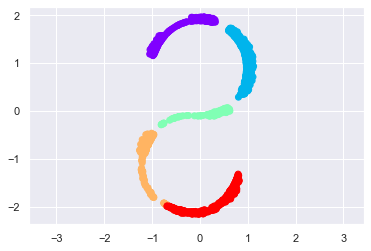

In [20]:
model=MDS(n_components=2,random_state=2)
outS=model.fit_transform(XS)
plt.scatter(outS[:,0],outS[:,1],**colorize)
plt.axis('equal')

(0.15, -0.15)

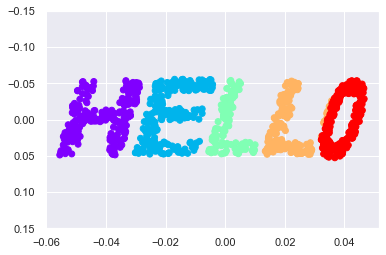

In [21]:
from sklearn.manifold import LocallyLinearEmbedding

model=LocallyLinearEmbedding(n_neighbors=100,n_components=2,method='modified',eigen_solver='dense')
out=model.fit_transform(XS)

fig,ax=plt.subplots()
ax.scatter(out[:,0],out[:,1],**colorize)
ax.set_ylim(0.15,-0.15)




In [22]:
from sklearn.datasets import fetch_lfw_people
faces=fetch_lfw_people(min_faces_per_person=30)

faces.data.shape

(2087, 2914)

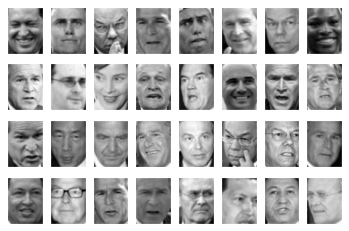

In [23]:
fig,ax = plt.subplots(4,8, subplot_kw=dict(xticks=[],yticks=[]))
for i,axi in enumerate(ax.flat):
    axi.imshow(faces.images[i],cmap='gray')

In [25]:
from sklearn.manifold import Isomap
model=Isomap(n_components=2)
proj=model.fit_transform(faces.data)
proj.shape





(2087, 2)

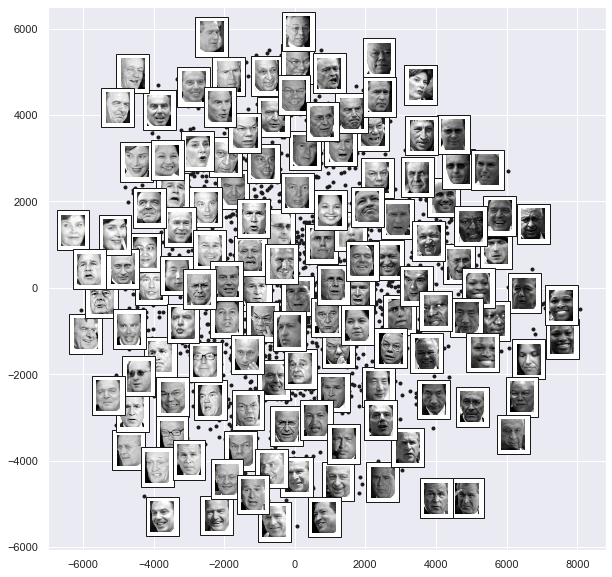

In [30]:
from matplotlib import offsetbox

def plot_components(data,model,images=None,ax=None,thumb_frac=0.05,cmap='gray'):

    ax=ax or plt.gca()
    proj=model.fit_transform(data)
    
    ax.plot(proj[:,0],proj[:,1],'.k')
    if images is not None:
        min_dist_2= (thumb_frac*max(proj.max(0)-proj.min(0)))**2
        shown_images=np.array([2*proj.max(0)])
        for i in range(data.shape[0]):
            dist=np.sum((proj[i]-shown_images)**2,1)
            if np.min(dist) < min_dist_2:
                continue
            shown_images=np.vstack([shown_images,proj[i]])
            imagebox=offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i],cmap=cmap),proj[i])
            ax.add_artist(imagebox)

fig,ax = plt.subplots(figsize=(10,10))
plot_components(faces.data,model=Isomap(n_components=2),
                   images=faces.images[:,::2,::2])



[[ 0.94973532  4.41906906]
 [-1.37324398  7.75368871]
 [ 1.98258281  0.86771314]
 [-1.58438467  2.83081263]]


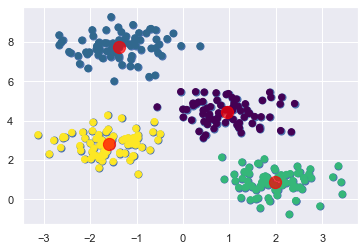

In [36]:
### K-MEANS

from sklearn.datasets.samples_generator import make_blobs

X,y_true= make_blobs(n_samples=300,centers=4,cluster_std=0.6,random_state=0)
plt.scatter(X[:,0],X[:,1],s=50)


from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans=kmeans.predict(X)

plt.scatter(X[:,0],X[:,1],c=y_kmeans,s=40,cmap='viridis')
centers=kmeans.cluster_centers_
print(centers)
plt.scatter(centers[:,0],centers[:,1],c='red',s=150,alpha=0.7)

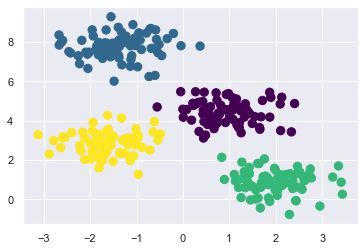

In [39]:

from sklearn.metrics import pairwise_distances_argmin

def find_cluster(X,n_clusters,rseed=2):
    rng=np.random.RandomState(rseed)
    i=rng.permutation(X.shape[0])[:n_clusters]
    centers=X[i]
    
    while True:
        labels=pairwise_distances_argmin(X,centers)
        new_centers=np.array([X[labels==i].mean(0) for i in range(n_clusters)])
        
        if np.all(centers==new_centers):
            break
        centers=new_centers
    return centers,labels

centers,labels=find_cluster(X,4)

plt.scatter(X[:,0],X[:,1],c=labels,s=70,cmap="viridis")



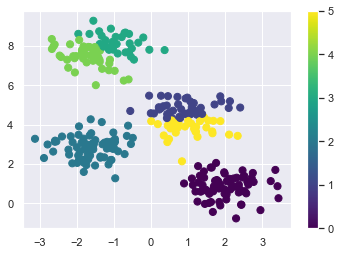

In [41]:
labels=KMeans(6,random_state=0).fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=labels,s=50,cmap='viridis')
plt.colorbar()

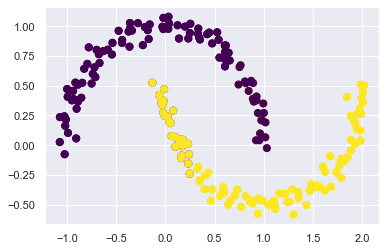

In [43]:
from sklearn.datasets import make_moons

X,y = make_moons(200,noise=.05,random_state=0)
labels=KMeans(2,random_state=0).fit_predict(X)

plt.scatter(X[:,0],X[:,1],c=labels, s=50,cmap='viridis')
#plt.scatter(X[:,0],X[:,1],c=labels, s=50,cmap='viridis')


E:\Conda\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


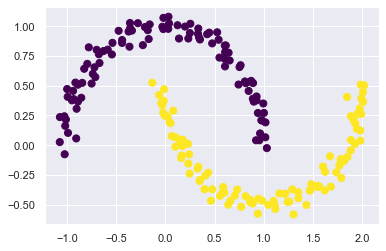

In [44]:
from sklearn.cluster import SpectralClustering
model=SpectralClustering(n_clusters=2,affinity='nearest_neighbors',
                         assign_labels='kmeans')

labels=model.fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=labels,s=50,cmap='viridis')

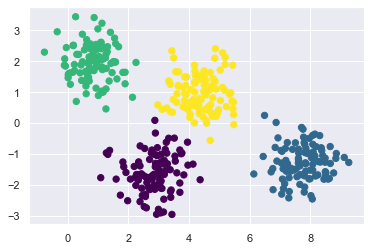

In [4]:
## GMM
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set()

from sklearn.datasets.samples_generator import make_blobs

X,y_true = make_blobs(n_samples=400,centers=4,cluster_std=0.6,random_state=0)

X=X[:,::-1]

from sklearn.cluster import KMeans
kmeans=KMeans(4,random_state=0)
labels=kmeans.fit(X).predict(X)

plt.scatter(X[:,0],X[:,1],c=labels,s=40,cmap='viridis')

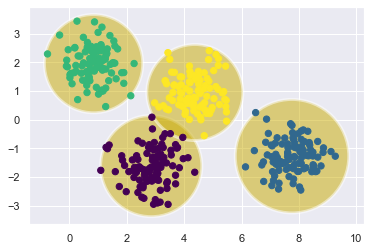

In [7]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans,X,n_clusters=4,rseed=0,ax=None):
    labels=kmeans.fit_predict(X)
    
    ax=ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:,0],X[:,1],c=labels,s=40,cmap='viridis',zorder=2)
    
    centers=kmeans.cluster_centers_
    radii=[cdist(X[labels==i],[center]).max()
          for i,center in enumerate(centers)]
    for c,r in zip(centers,radii):
        ax.add_patch(plt.Circle(c,r,fc='#CAAC',lw=3,alpha=0.5,zorder=1))
        

kmeans=KMeans(n_clusters=4,random_state=0)
plot_kmeans(kmeans,X)

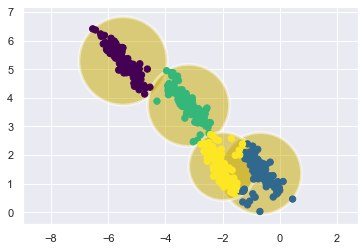

In [8]:
rng=np.random.RandomState(13)
X_stretched=np.dot(X,rng.randn(2,2))

kmeans=KMeans(n_clusters=4,random_state=0)
plot_kmeans(kmeans,X_stretched)

[[0.    0.537 0.463 0.   ]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.    1.    0.    0.   ]
 [1.    0.    0.    0.   ]]


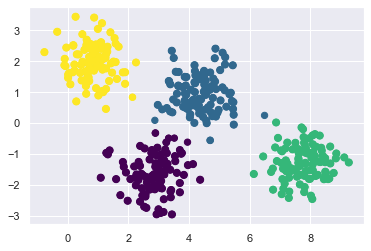

In [17]:
from sklearn import mixture

gmm=mixture.GaussianMixture(n_components=4).fit(X)
labels=gmm.predict(X)

plt.scatter(X[:,0],X[:,1],c=labels,s=40,cmap='viridis')
probs=gmm.predict_proba(X)
print(probs[:5].round(3))

size=50* probs.max(1)**2
plt.scatter(X[:,0],X[:,1],c=labels,cmap='viridis',s=size)


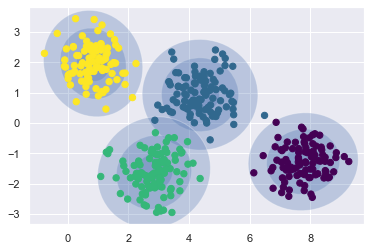

In [30]:
from matplotlib.patches import Ellipse

def draw_ellipse(position,covariance,ax=None,**kwargs):
    
    ax = ax or plt.gca()
    
    if covariance.shape==(2,2):
        U,s,Vt=np.linalg.svd(covariance)
        angle=np.degrees(np.arctan2(U[1,0],U[0,0]))
        width,height=2*np.sqrt(s)
    else:
        angle=0
        width,height=2*np.sqrt(covariance)
        
    for nsig in range(1,4):
        ax.add_patch(Ellipse(position,nsig*width,nsig*height,
                            angle,**kwargs))
        
def plot_gmm(gmm,X,label=True,ax=None):
    
    ax=ax or plt.gca()
    
    labels=gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:,0],X[:,1],c=labels,s=40,cmap='viridis',zorder=2)
    else:
        ax.scatter(X[:,0],X[:,1],s=40,zorder=2)
    ax.axis('equal')
    w_factor= 0.3 / gmm.weights_.max()
    for pos,covar,w in zip(gmm.means_,gmm.covariances_,gmm.weights_):
        draw_ellipse(pos,covar,alpha=w*w_factor)

gmm=mixture.GaussianMixture(n_components=4,random_state=42)

plot_gmm(gmm,X)


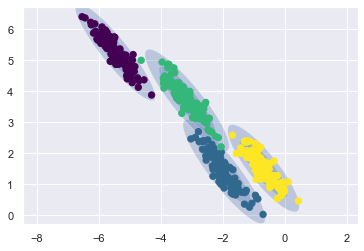

In [31]:
gmm=mixture.GaussianMixture(n_components=4,covariance_type='full',random_state=42)
plot_gmm(gmm,X_stretched)

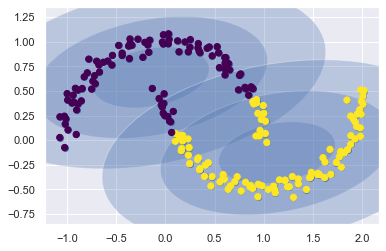

In [35]:
from sklearn.datasets import make_moons

Xmoon,ymoon=make_moons(200,noise=0.05,random_state=0)
plt.scatter(Xmoon[:,0],Xmoon[:,1])
gmm2=mixture.GaussianMixture(n_components=2,covariance_type='full',random_state=0)

plot_gmm(gmm2,Xmoon)

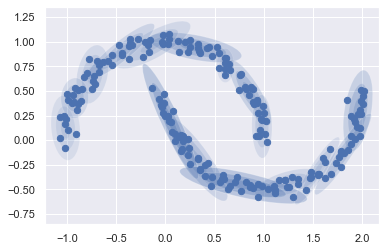

In [36]:
gmm16=mixture.GaussianMixture(n_components=16,covariance_type='full',random_state=0)
plot_gmm(gmm16,Xmoon,label=False)

Text(0.5, 0, 'n_components')

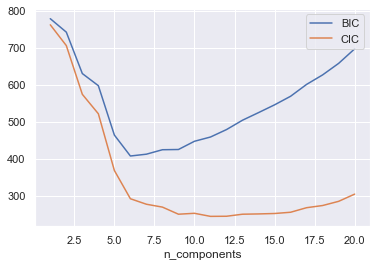

In [42]:
n_components=np.arange(1,21)
models=[mixture.GaussianMixture(n,covariance_type='full',random_state=0).fit(Xmoon) for n in n_components]

plt.plot(n_components,[m.bic(Xmoon) for m in models],label='BIC')
plt.plot(n_components,[m.aic(Xmoon) for m in models],label='CIC')
plt.legend(loc='best')
plt.xlabel('n_components')

19
4.649650545836979
[<matplotlib.patches.Rectangle object at 0x0000010A270B0B80>, <matplotlib.patches.Rectangle object at 0x0000010A270B09A0>]
1.0


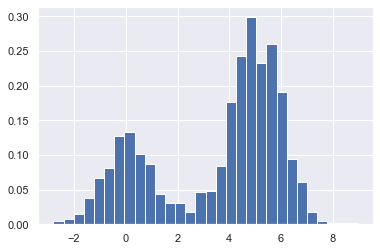

In [17]:
### 509 KDE

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set()

def make_data(N,f=0.3,rseed=1):
    rand=np.random.RandomState(rseed)
    x=rand.randn(N)
    x[int(f* N):]+=5
    return x

x=make_data(1000)
hist=plt.hist(x,bins=30,density=True)

density,bins,patches=hist
print(np.argmax(density))
print(bins[19])
#print(patches[:2])
widths=bins[1:]-bins[:-1]
print((density*widths).sum())

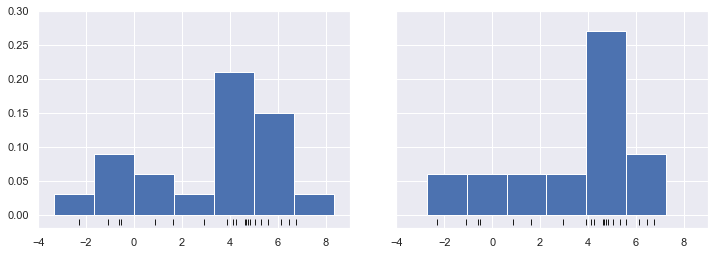

In [21]:
x=make_data(20)
bins=np.linspace(-5,10,10)

fig,ax =plt.subplots(1,2,figsize=(12,4),sharex=True,sharey=True,subplot_kw={'xlim':(-4,9),'ylim':(-0.02,0.3)}
            )
fig.subplots_adjust(wspace=0.15)


for i, offset in enumerate([0.0,0.6]):
    ax[i].hist(x,bins=bins+offset,density=True)
    ax[i].plot(x,np.full_like(x,-0.01),'|k',markeredgewidth=1)
## histogram problem distribution prob



(-0.2, 8.0)

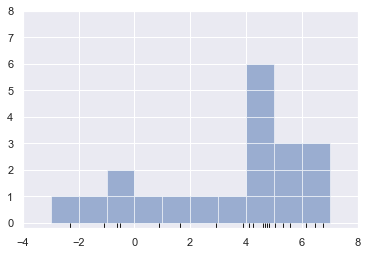

In [28]:
fig,ax =plt.subplots()
bins=np.arange(-3,8)
ax.plot(x,np.full_like(x,-0.1),'|k',markeredgewidth=1)

for count,edge in zip(*np.histogram(x,bins)):
    for i in range(count):
        ax.add_patch(plt.Rectangle((edge,i),1,1,alpha=0.5))

ax.set_xlim(-4,8)
ax.set_ylim(-0.2,8)


(-4.0, 8.0, -0.2, 8.0)

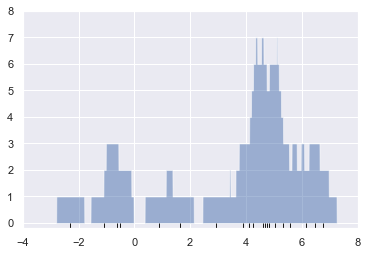

In [29]:
x_d=np.linspace(-4,8,2000)

density=sum((abs(xi-x_d)<0.5)for xi in x)

plt.fill_between(x_d,density,alpha=0.5)
plt.plot(x,np.full_like(x,-0.1),'|k',markeredgewidth=1)

plt.axis([-4,8,-0.2,8])


1000


(-4.0, 8.0, -0.2, 5.0)

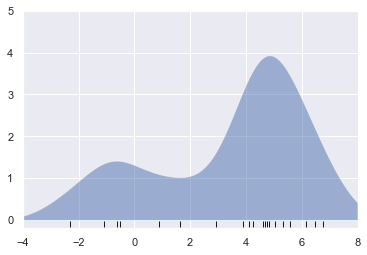

In [35]:
from scipy.stats import norm

x_d=np.linspace(-4,8,1000)
density=sum(norm(xi).pdf(x_d) for xi in x)
print(len(density))
plt.fill_between(x_d,density,alpha=0.5)
plt.plot(x,np.full_like(x,-0.1),'|k',markeredgewidth=1)

plt.axis([-4,8,-0.2,5])

(-0.02, 0.22)

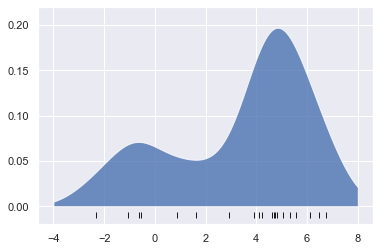

In [40]:
from sklearn.neighbors import KernelDensity

kde=KernelDensity(bandwidth=1.0,kernel='gaussian')
kde.fit(x[:,None])

logprob=kde.score_samples(x_d[:,None])

plt.fill_between(x_d,np.exp(logprob),alpha=0.8)
plt.plot(x,np.full_like(x,-0.01),'|k',markeredgewidth=1)
plt.ylim(-0.02,0.22)



In [44]:
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import LeaveOneOut

bandwidths= 10** np.linspace(-1,1,1000)
grid=GridSearchCV(KernelDensity(kernel='gaussian'),{'bandwidth':bandwidths},
                 cv=LeaveOneOut())

grid.fit(x[:,None])
print(grid.best_params_)

{'bandwidth': 1.1144152514667875}


In [45]:
from sklearn.datasets import fetch_species_distributions

data=fetch_species_distributions()

In [49]:
latlon=np.vstack([data.train['dd lat'],
                 data.train['dd long']]).T
species=np.array([d.decode('ascii').startswith('micro')
                  for d in data.train['species']],dtype='int')



ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [55]:
from sklearn.base import BaseEstimator, ClassifierMixin


class KDEClassifier(BaseEstimator,ClassifierMixin):
    
    def __init__(self,bandwidth=1.0,kernel='gaussian'):
        self.bandwidth=bandwidth
        self.kernel=kernel
        
    def fit(self,X,y):
        
        self.classes_=np.sort(np.unique(y))
        training_sets= [X[y==yi] for yi in self.classes_]
        self.models_ = [KernelDensity(bandwidth=self.bandwidth,kernel=self.kernel).fit(Xi)
                        for Xi in training_sets]
        
        self.logpriors_=[np.log(Xi.shape[0]/X.shape[0]) for Xi in training_sets]
        
        return self
    
    def predict_proba(self,X):
        logprobs=np.array([model.score_samples(X)
                           for model in self.models_]).T
        result=np.exp(logprobs+self.logpriors_)
        return result/result.sum(1,keepdims=True)
    def predict(self,X):
        return self.classes_[np.argmax(self.predict_proba(X),1)]
    




In [57]:
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV

digits=load_digits()

bandwidths=10 ** np.linspace(0,2,100)
grid=GridSearchCV(KDEClassifier(),{'bandwidth':bandwidths})



AttributeError: 'GridSearchCV' object has no attribute 'grid_scores_'

In [59]:
grid.fit(digits.data,digits.target)
scores=[val['mean_train_score'] for val in grid.cv_results_]


TypeError: string indices must be integers

In [ ]:
plt.semilogx(bandwidths,scores)
plt.xlabel('bandwidth')
plt.ylabel('accuracy')
plt.title('KDE model Performance')
print(grid.best_params_)
print("accuracy=",grid.best_score_)

0.8069281956050759

Text(0.5, 1.0, 'visual of HOG ')

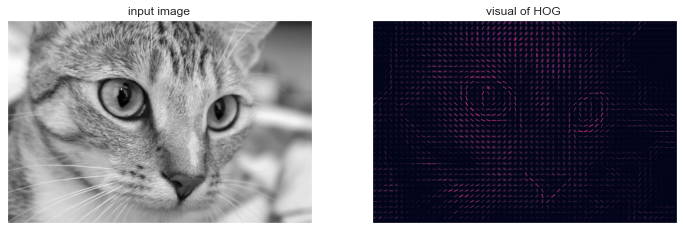

In [72]:
from sklearn.datasets import fetch_lfw_people

faces=fetch_lfw_people()
positive_patches=faces.images
positive_patches.shape

UnidentifiedImageError: cannot identify image file 'C:\\Users\\feder\\scikit_learn_data\\lfw_home\\lfw_funneled\\Robert_Mueller\\Robert_Mueller_0001.jpg'